In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [2]:
df = pd.read_csv('csgo.csv')
df.head()

,map,day,month,year,date,wait_time_s,match_time_s,team_a_rounds,team_b_rounds,ping,kills,assists,deaths,mvps,hs_percent,points,result
0,Mirage,3.0,8.0,2018.0,3/8/2018,327.0,2906.0,16.0,13.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0,Win
1,Mirage,2.0,8.0,2018.0,2/8/2018,336.0,2592.0,16.0,11.0,199.0,13.0,4.0,24.0,2.0,0.0,40.0,Lost
2,Mirage,31.0,7.0,2018.0,31/7/2018,414.0,2731.0,16.0,14.0,85.0,15.0,3.0,18.0,3.0,26.0,37.0,Win
3,Mirage,31.0,7.0,2018.0,31/7/2018,317.0,2379.0,11.0,16.0,93.0,12.0,2.0,15.0,2.0,16.0,30.0,Lost
4,Mirage,30.0,7.0,2018.0,30/7/2018,340.0,3467.0,15.0,15.0,94.0,33.0,5.0,20.0,5.0,30.0,83.0,Tie


In [3]:
final_df = df.drop(columns=['day', 'month', 'year', 'date', 'wait_time_s', 'match_time_s'])
final_df.head()

,map,team_a_rounds,team_b_rounds,ping,kills,assists,deaths,mvps,hs_percent,points,result
0,Mirage,16.0,13.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0,Win
1,Mirage,16.0,11.0,199.0,13.0,4.0,24.0,2.0,0.0,40.0,Lost
2,Mirage,16.0,14.0,85.0,15.0,3.0,18.0,3.0,26.0,37.0,Win
3,Mirage,11.0,16.0,93.0,12.0,2.0,15.0,2.0,16.0,30.0,Lost
4,Mirage,15.0,15.0,94.0,33.0,5.0,20.0,5.0,30.0,83.0,Tie


In [4]:
final_df.describe()

,team_a_rounds,team_b_rounds,ping,kills,assists,deaths,mvps,hs_percent,points
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,12.393645,12.269197,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123
std,4.539815,4.509403,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000
50%,15.000000,15.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000
75%,16.000000,16.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000
max,16.000000,16.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   map            1133 non-null   object 
 1   team_a_rounds  1133 non-null   float64
 2   team_b_rounds  1133 non-null   float64
 3   ping           1133 non-null   float64
 4   kills          1133 non-null   float64
 5   assists        1133 non-null   float64
 6   deaths         1133 non-null   float64
 7   mvps           1133 non-null   float64
 8   hs_percent     1133 non-null   float64
 9   points         1133 non-null   float64
 10  result         1133 non-null   object 
dtypes: float64(9), object(2)
memory usage: 97.5+ KB


In [6]:
final_df.isna().sum()

map              0
team_a_rounds    0
team_b_rounds    0
ping             0
kills            0
assists          0
deaths           0
mvps             0
hs_percent       0
points           0
result           0
dtype: int64

In [7]:
final_df.duplicated().sum()

0

In [8]:
final_df[['map']].value_counts()

map        
Dust II        547
Mirage         363
Inferno        132
Cache           59
Overpass        13
Cobblestone     12
Nuke             4
Austria          1
Canals           1
Italy            1
Name: count, dtype: int64

In [9]:
final_df[['result']].value_counts()

result
Lost      560
Win       488
Tie        85
Name: count, dtype: int64

In [13]:
le = LabelEncoder()
final_df['map'] = le.fit_transform(final_df['map'])
final_df['result'] = le.fit_transform(final_df['result'])
final_df['result']

0       2
1       0
2       2
3       0
4       1
       ..
1128    0
1129    0
1130    0
1131    0
1132    2
Name: result, Length: 1133, dtype: int64

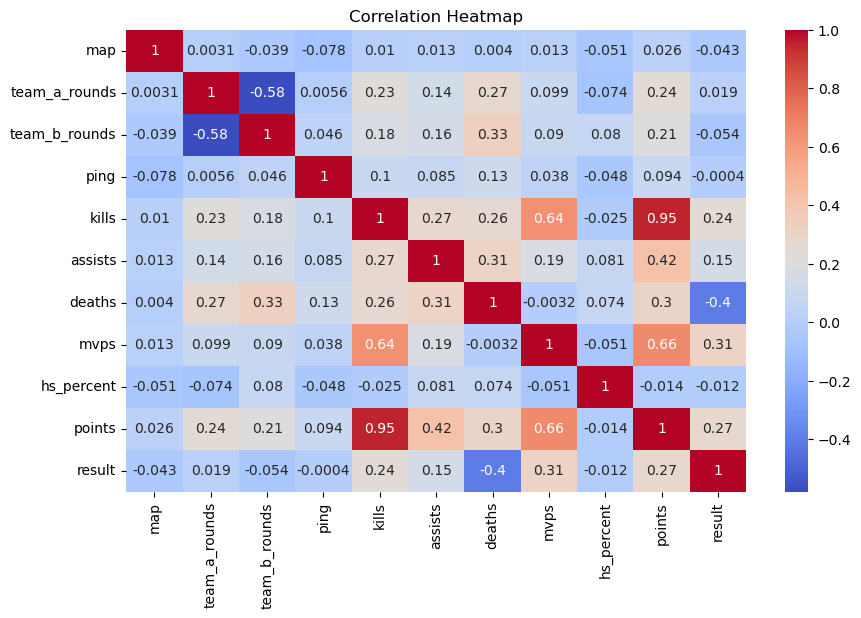

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

,map,team_a_rounds,team_b_rounds,ping,kills,assists,deaths,mvps,hs_percent,points,result
0,7,16.0,13.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0,2
1,7,16.0,11.0,199.0,13.0,4.0,24.0,2.0,0.0,40.0,0
2,7,16.0,14.0,85.0,15.0,3.0,18.0,3.0,26.0,37.0,2
3,7,11.0,16.0,93.0,12.0,2.0,15.0,2.0,16.0,30.0,0
4,7,15.0,15.0,94.0,33.0,5.0,20.0,5.0,30.0,83.0,1


In [22]:
target = 'result'
x = final_df.drop(columns=[target])
y = final_df[target]
print(x.shape, y.shape)

(1133, 10) (1133,)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [26]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy' , 'log_loss']
}

In [28]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_
grid_search.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=   0.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=   0.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=   0.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=   0.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=   0.1s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.3s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.4s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.3s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.3s
[CV] END ...................criterion=gini, n_estimators=200; total time=   0.4s
[CV] END ...................criterion=gini, n_estimators=300; total time=   0.6s
[CV] END ...................criterion=gini, n_est

0.8164589973920604

In [32]:
print('Best Parameters: {} \nBest Score: {}'.format(grid_search.best_params_ , grid_search.best_score_))

Best Parameters: {'criterion': 'entropy', 'n_estimators': 300} 
Best Score: 0.8164589973920604


In [44]:
model = LogisticRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        54
           1       0.38      0.23      0.29        13
           2       0.72      0.77      0.74        47

    accuracy                           0.68       114
   macro avg       0.60      0.57      0.58       114
weighted avg       0.67      0.68      0.67       114



In [46]:
for x , i in zip(y_test , y_pred):
    print('Precision: {} , Actual: {}'.format(i , x))

Precision: 0 , Actual: 0
Precision: 2 , Actual: 2
Precision: 2 , Actual: 2
Precision: 0 , Actual: 0
Precision: 0 , Actual: 1
Precision: 0 , Actual: 0
Precision: 0 , Actual: 2
Precision: 2 , Actual: 2
Precision: 0 , Actual: 0
Precision: 2 , Actual: 2
Precision: 0 , Actual: 0
Precision: 2 , Actual: 2
Precision: 2 , Actual: 2
Precision: 1 , Actual: 1
Precision: 2 , Actual: 2
Precision: 0 , Actual: 0
Precision: 1 , Actual: 0
Precision: 0 , Actual: 1
Precision: 2 , Actual: 2
Precision: 0 , Actual: 0
Precision: 2 , Actual: 0
Precision: 2 , Actual: 1
Precision: 0 , Actual: 1
Precision: 2 , Actual: 2
Precision: 0 , Actual: 0
Precision: 0 , Actual: 0
Precision: 2 , Actual: 0
Precision: 2 , Actual: 2
Precision: 1 , Actual: 0
Precision: 0 , Actual: 0
Precision: 2 , Actual: 0
Precision: 1 , Actual: 2
Precision: 0 , Actual: 0
Precision: 0 , Actual: 0
Precision: 0 , Actual: 0
Precision: 2 , Actual: 2
Precision: 2 , Actual: 2
Precision: 2 , Actual: 2
Precision: 2 , Actual: 2
Precision: 0 , Actual: 0
